In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [230]:
#LOADING DATA INTO PANDAS DF FROM 'zippedData/'
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv')
# title_alias = pd.read_csv('zippedData/imdb.title.akas.csv') #Not Particularly useful (Title and region data)
title_basics = pd.read_csv('zippedData/imdb.title.basics.csv') #Contains Genre info and Title
title_crew = pd.read_csv('zippedData/imdb.title.crew.csv') #Contains Director ID and Writer ID
title_principals = pd.read_csv('zippedData/imdb.title.principals.csv')
title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')
reviews = pd.read_csv('zippedData/rt.reviews.tsv', sep='\t', encoding= 'unicode_escape')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
print('nessisary files loaded into pandas successfully')

nessisary files loaded into pandas successfully


In [231]:
added_roi_to_melt_df

,movie,production_budget,worldwide_gross,Year,ROI,tconst,primary_title,original_title,start_year,runtime_minutes,genres,variable,value
0,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,2011,1.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",0,Action
1,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,2011,1.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",1,Adventure
2,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,2011,1.546673,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",2,Fantasy
3,Dark Phoenix,350000000,149762350,2019,-0.572108,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",0,Action
4,Dark Phoenix,350000000,149762350,2019,-0.572108,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",1,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3623,Raymond Did It,40000,3632,2011,-0.909200,tt1716760,Raymond Did It,Raymond Did It,2011,83.0,Horror,0,Horror
3624,Emily,27000,3547,2017,-0.868630,tt4393036,Emily,Emily,2017,83.0,Drama,0,Drama
3625,Exeter,25000,489792,2015,18.591680,tt1945044,Exeter,Exeter,2015,91.0,"Horror,Mystery,Thriller",0,Horror
3626,Exeter,25000,489792,2015,18.591680,tt1945044,Exeter,Exeter,2015,91.0,"Horror,Mystery,Thriller",1,Mystery


In [232]:
#EDA FOR SEPERATING GENRES FOR ANALYSIS
    #WORKS WITH CELL BELOW
    #

    #FINDS UNIQUE GENRES FOR COLUMN CREATION
genre_df = title_basics['genres'].str.split(',', expand=True)
genre_df = pd.melt(genre_df)
genre_list = list(set(genre_df['value']))
genre_list.remove(np.nan)
genre_list.remove(None)

genre_col_df = pd.DataFrame(columns=genre_list)

extended_genre_df = pd.concat([title_basics, genre_col_df], axis=1)

len(extended_genre_df.columns[7:]) #NUMBER OF UNIQUE GENRE COLUMNS = 26

genre_df_filled = extended_genre_df.dropna(axis=0, subset=['genres'], inplace=False).reset_index().copy()

genre_df_filled

,index,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Sport,Reality-TV,...,Biography,News,Comedy,Adventure,Musical,Animation,History,Horror,Mystery,Drama
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140731,146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140732,146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140733,146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140734,146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
#EDA SPLITS DATA ASSIGNS 1/0 TO GENRES IN COLUMNS 1=TRUE 0=FALSE
    #LOGIC WORKS TAKES A LONG TIME TO RUN
    #WORKS IN CONJUNCTION WITH CELL ABOVE
    #MUCH SLOWER COMPARED TO MELT METHOD BELOW
    
# pd.options.mode.chained_assignment = None 

for genre in genre_df_filled.columns[7:]:
    for row in range(0, genre_df_filled.shape[0]): #genre_df_filled.shape[0]
        if genre_df_filled['genres'][row] in genre:
            genre_df_filled[genre][row] = 1
        else:
            genre_df_filled[genre][row] = 0

genre_df_filled #2000x26 = 52,0000 (40s) -> 140735x26 = 3,659,110 (47mins)

<ipython-input-233-18e594f718df>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df_filled[genre][row] = 0
<ipython-input-233-18e594f718df>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df_filled[genre][row] = 1


KeyboardInterrupt: 

In [ ]:
genre_df_filled.shape[0]

In [234]:
# genre_df = title_basics['genres'].str.split(',', expand=True)
# genre_df = pd.melt(genre_df)
# genre_df.groupby('value').count().sort_values('variable', ascending=False).head(10)

new_df_test_0 = None
new_df_test_0 = pd.concat([title_basics, title_basics['genres'].str.split(',', expand=True)], axis=1)
# new_df_test_0

melted_df = pd.melt(new_df_test_0 ,id_vars=list(title_basics.columns)).dropna(axis=0, subset=['value'])

# len(list(set(melted_df['value'])))
# set(melted_df['value'])

melted_df

# melted_df.dropna(axis=1, )
# set(list(melted_df['value']))
# test = melted_df[melted_df['value'] != ]
# test

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,variable,value
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",0,Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,Biography
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",0,Comedy
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,Comedy
...,...,...,...,...,...,...,...,...
438407,tt9913594,Bacchanalia,Bacchanalia,2017,72.0,"Drama,Mystery,Thriller",2,Thriller
438416,tt9914828,The War of Godzilla,The War of Godzilla,2015,102.0,"Action,Comedy,Family",2,Family
438420,tt9915872,The Last White Witch,The Last White Witch,2019,97.0,"Comedy,Drama,Fantasy",2,Fantasy
438421,tt9916132,The Mystery of a Buryat Lama,The Mystery of a Buryat Lama,2018,94.0,"Biography,Documentary,History",2,History


In [235]:
#TRANSORMING DATA SET
    #RUN ONCE
movie_budgets['Year'] = movie_budgets.apply(lambda x: x['release_date'][-4:], axis=1).astype(int)
movie_budgets['production_budget'] = movie_budgets.apply(lambda x: x['production_budget'].strip('$').replace(',',''), axis=1).astype('int')
movie_budgets['worldwide_gross'] = movie_budgets.apply(lambda x: x['worldwide_gross'].strip('$').replace(',',''), axis=1).astype('int')

movie_budgets['ROI'] = (movie_budgets['worldwide_gross']-movie_budgets['production_budget'])/movie_budgets['production_budget']

#REMOVING UNNESSESARY COLUMNS
movie_budgets_mod = movie_budgets.drop(['domestic_gross', 'id'], axis=1)

movie_budgets_mod

,release_date,movie,production_budget,worldwide_gross,Year,ROI
0,"Dec 18, 2009",Avatar,425000000,2776345279,2009,5.532577
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,2011,1.546673
2,"Jun 7, 2019",Dark Phoenix,350000000,149762350,2019,-0.572108
3,"May 1, 2015",Avengers: Age of Ultron,330600000,1403013963,2015,3.243841
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,2017,3.153696
...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,2018,-1.000000
5778,"Apr 2, 1999",Following,6000,240495,1999,39.082500
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,2005,-0.732400
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,2015,-1.000000


In [236]:
#EDA
# movie_budgets_mod.groupby(by='Year').mean() # ['movie', 'production_budget', 'worldwide_gross', 'Year', 'ROI']

movie_budgets_mod = movie_budgets_mod[movie_budgets_mod['worldwide_gross'] != 0] #367 entries with missing gross
# print(movie_budgets_mod) #5781 entries total

In [237]:
#COMBINE DATASETS BASED ON TITLE AND YEAR

#https://stackoverflow.com/questions/53549492/joining-two-pandas-dataframes-based-on-multiple-conditions
added_roi_to_melt_df = movie_budgets_mod.merge(melted_df, 
                                               how='inner', 
                                               left_on=['movie', 'Year'], 
                                               right_on=['primary_title', 'start_year'])
melt_pivot = added_roi_to_melt_df.pivot(index=['tconst', 'movie', 'Year'], 
                                        columns=['value'], 
                                        values='ROI')
genre_roi_by_year = melt_pivot.groupby(by='Year', 
                                       axis=0).median()
# genre_roi_by_year = melt_pivot[melt_pivot.groupby(by='Year', axis=0).count() > 80].groupby(by='Year', axis=0).median()

In [238]:
movie_budgets_mod.sort_values(by='worldwide_gross')

,release_date,movie,production_budget,worldwide_gross,Year,ROI
5302,"Dec 11, 2015",American Hero,1000000,26,2015,-0.999974
5335,"Nov 21, 2014",Food Chains,913000,176,2014,-0.999807
5770,"Aug 14, 2008",The Rise and Fall of Miss Thang,10000,401,2008,-0.959900
5518,"Oct 13, 2005",The Dark Hours,400000,423,2005,-0.998942
5383,"Dec 31, 2014",Destiny,750000,450,2014,-0.999400
...,...,...,...,...,...,...
33,"Jun 12, 2015",Jurassic World,215000000,1648854864,2015,6.669092
6,"Apr 27, 2018",Avengers: Infinity War,300000000,2048134200,2018,5.827114
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,2053311220,2015,5.710167
42,"Dec 19, 1997",Titanic,200000000,2208208395,1997,10.041042


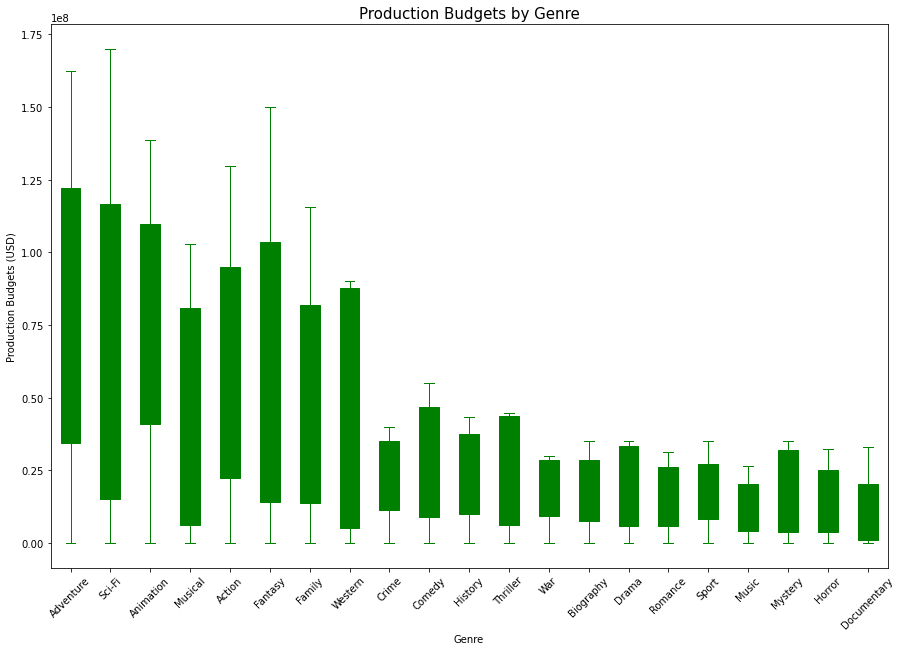

In [239]:
added_roi_to_melt_df
#
budget_pivot = added_roi_to_melt_df.pivot(index=['tconst', 'movie', 'Year'], 
                                          columns=['value'], 
                                          values='production_budget')
# print(budget_pivot)
# SORTING BY MEDIAN HIGH TO LOW
median_budgets = budget_pivot.median()
median_budgets.sort_values(ascending=False, inplace=True)
budget_pivot = budget_pivot[median_budgets.index]
# CREATING DETAILS FOR THE FIGURE
budget_boxplot = budget_pivot.describe().boxplot(figsize=(15,10), 
                                                 rot=45, 
                                                 showfliers=False, 
                                                 color='green', 
                                                 patch_artist=True, 
                                                 grid=False)
budget_boxplot.set_title('Production Budgets by Genre', fontsize=15)
budget_boxplot.set_ylabel('Production Budgets (USD)')
budget_boxplot.set_xlabel('Genre');

#SPLIT THIS PLOT INTO 2 
    #ONE WHERE THE MEDIAN IS GREATER THAN 50,000,000
    #TWO WHERE THE MEDIAN IS LESS THAN 50,000,000
#CHANGE FORMAT OF THE BOXPLOT TO NOT DISPLAY MAX AND MIN AND ONLY SHOW THE IQR

# median_roi_greater_than_one = genre_roi_by_year.median()[genre_roi_by_year.median() > 1]
# median_roi_greater_than_one.sort_values(ascending=False)


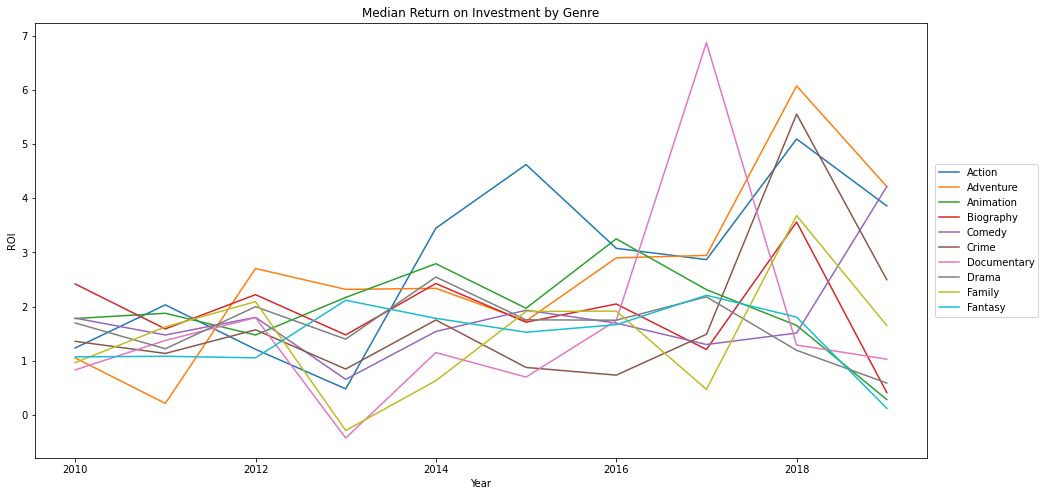

In [159]:
# genre_roi_by_year
# pd.plot(genre_roi_by_year)

# lines = genre_roi_by_year.plot.line()

top_15_roi_genres = genre_roi_by_year.sum().sort_values(ascending=False)[0:10].index
# top_15_roi_genres

fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(genre_roi_by_year[top_15_roi_genres])

ax.legend(genre_roi_by_year, loc='right', bbox_to_anchor=(1.13, .5))
# ax.legend()

ax.set_xlabel("Year")
ax.set_ylabel("ROI")
ax.set_title("Median Return on Investment by Genre");

#ADD Y AXIS LABEL
#ADD TITLE
#FILTER OUT GENRES THAT HAVE LESS THEN 80 

In [240]:
# test_join = pd.concat((title_basics.set_index('primary_title'), movie_budgets.set_index('movie')), axis=1, join='inner', keys=('primary_title', 'movie'))
new_df = title_basics.set_index('primary_title').join(movie_budgets.set_index('movie')).sort_values('worldwide_gross').dropna()
new_df['production_budget_int'] = new_df.apply(lambda x: x['production_budget'].strip('$').replace(',',''), axis=1).astype('int')
new_df['worldwide_gross_int'] = new_df.apply(lambda x: x['worldwide_gross'].strip('$').replace(',',''), axis=1).astype('int')
new_df['p_and_l'] = new_df['worldwide_gross_int'] - new_df['production_budget_int']
new_df['norm_roi'] = new_df['p_and_l'] / new_df['production_budget_int']
# new_df.sort_values('worldwide_gross_int', ascending=False).head(10)
new_df.describe()

AttributeError: 'float' object has no attribute 'strip'

In [241]:
# genre_df = title_basics['genres'].str.split(',', expand=True)
title_basics.groupby('start_year').count()

,tconst,primary_title,original_title,runtime_minutes,genres
start_year,,,,,
2010,11849,11849,11849,9986,11452
2011,12900,12900,12900,10707,12432
2012,13787,13787,13786,11405,13356
2013,14709,14709,14708,12308,14298
2014,15589,15589,15589,12964,15095
2015,16243,16243,16242,13252,15569
2016,17272,17272,17269,13514,16353
2017,17504,17504,17494,13466,16816
2018,16849,16849,16846,12213,16293


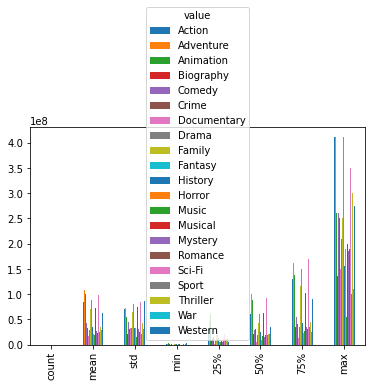

In [244]:
#EDA WITH MELT DATA

# added_roi_to_melt_df

bar_pivot = added_roi_to_melt_df.pivot(index=['tconst', 'movie', 'Year'], columns=['value'], values='production_budget')
genre_budget = bar_pivot.describe()
bar = genre_budget.plot.bar()
# genre_budget = bar_pivot.groupby(by='Year', axis=0).median()


In [246]:
# movie_budgets.head()
# title_basics.head()
# movie_gross.head()
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [247]:
top_15_roi_genres = genre_roi_by_year.sum().sort_values(ascending=False)[0:15].index
top_15_roi_genres

Index(['Mystery', 'Horror', 'Animation', 'Sci-Fi', 'Thriller', 'Romance',
       'Family', 'Adventure', 'Music', 'Comedy', 'Fantasy', 'Action',
       'Biography', 'Musical', 'History'],
      dtype='object', name='value')

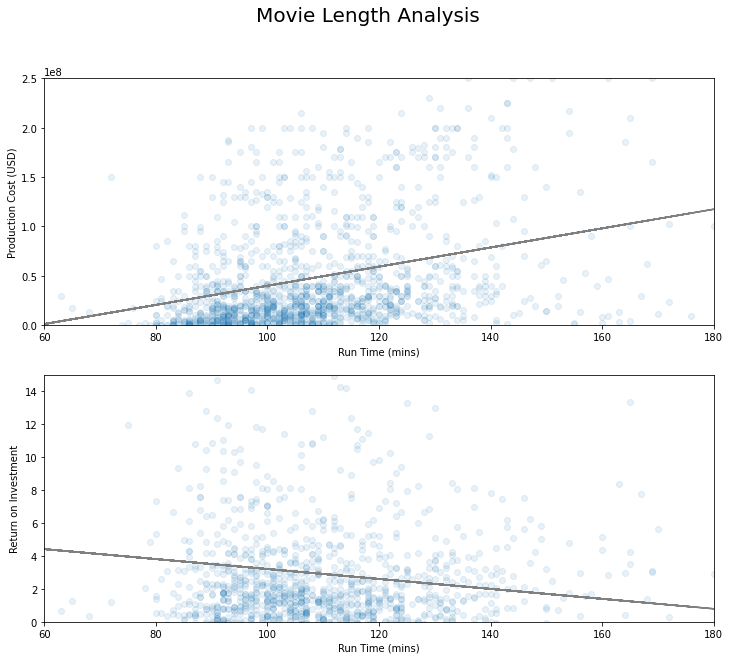

In [248]:
runtime_df = added_roi_to_melt_df[added_roi_to_melt_df['runtime_minutes'] > 0] #shape = 3613
runtime_df = runtime_df.drop_duplicates(subset='tconst')
x_runtime = runtime_df['runtime_minutes']
y_budget = runtime_df['production_budget']
y2_roi = runtime_df['ROI']

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 10))

m1, b1 = np.polyfit(x_runtime, y_budget, 1)
m2, b2 = np.polyfit(x_runtime, y2_roi, 1)

ax2.set_ylim(bottom=0, top=15)
ax1.set_ylim(bottom=0, top=250000000)
ax2.set_xlim(left=60, right=180)
ax1.set_xlim(left=60, right=180)

fig.suptitle('Movie Length Analysis', fontsize=20)

ax1.set_xlabel('Run Time (mins)')
ax1.set_ylabel('Production Cost (USD)')

ax2.set_xlabel('Run Time (mins)')
ax2.set_ylabel('Return on Investment')

ax1.scatter(x_runtime, y_budget, alpha=.1)
ax1.plot(x_runtime, m1*x_runtime + b1, c='grey')

ax2.scatter(x_runtime, y2_roi, alpha=.1)
ax2.plot(x_runtime, m2*x_runtime + b2, c='grey');

<BarContainer object of 12 artists>

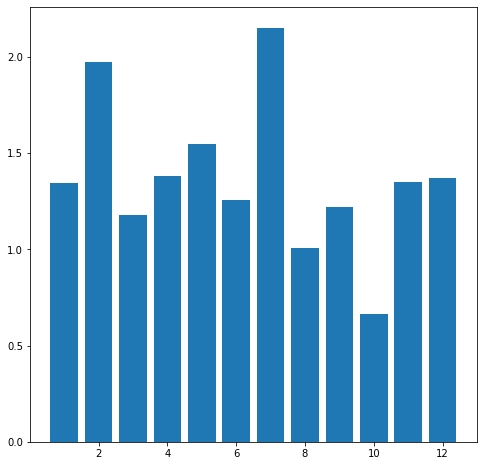

In [293]:
# release_date = added_roi_to_melt_df['release_date']
# release_month = release_date[0:3]
# release_month

release_month_df = added_roi_to_melt_df
release_month_df['Release_Month'] = release_month_df.apply(lambda x: x['release_date'][0:3], axis=1)
month_analysis_df = release_month_df.groupby(by='Release_Month', axis=0)['ROI'].describe()

mon_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
month_analysis_df['Month_index'] = month_analysis_df.index.map(mon_dict)

# month_analysis_df.sort_values('Month_index')
# month_analysis_df.sort_values(by='Month_index').index

x_bar_mon = month_analysis_df['Month_index']
y_bar_mon = month_analysis_df['50%']

fig, ax = plt.subplots(figsize=(8, 8))

# ax.set_xticks
plt.bar(x_bar_mon, y_bar_mon)
# movie_budgets['Year'] = movie_budgets.apply(lambda x: x['release_date'][-4:], axis=1).astype(int)

In [284]:
month_analysis_df

mon_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
month_analysis_df['Month_index'] = month_analysis_df.index.map(mon_dict)

month_analysis_df.sort_values(by='Month_index').index

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object', name='Release_Month')